In [1]:
# Import libraries and packages.

### YOUR CODE HERE ### 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Import Tukey's HSD function
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA.

### YOUR CODE HERE ### 
data = pd.read_csv('marketing_sales_data.csv')
data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377


The features in the data are:

TV promotion budget (in Low, Medium, and High categories)
Social media promotion budget (in millions of dollars)
Radio promotion budget (in millions of dollars)
Sales (in millions of dollars)
Influencer size (in Mega, Macro, Nano, and Micro categories)

## Data exploration

<AxesSubplot:xlabel='TV', ylabel='Sales'>

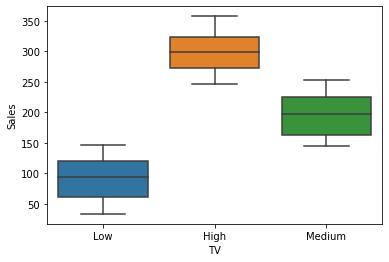

In [3]:
# Create a boxplot with TV and Sales.
sns.boxplot(x = 'TV', y = 'Sales', data = data)


<AxesSubplot:xlabel='Influencer', ylabel='Sales'>

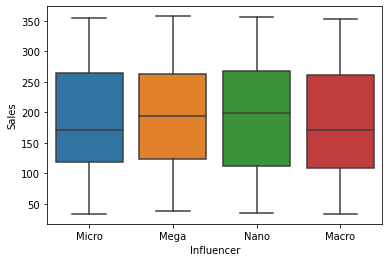

In [4]:
# Create a boxplot with Influencer and Sales.
sns.boxplot(x = 'Influencer', y = 'Sales', data = data)

### Remove missing data

In [5]:
 data.isna().sum()

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

In [6]:
data = data.dropna(axis = 0)

## Model building

Fit a linear regression model that predicts Sales using one of the independent categorical variables in data

In [7]:
ols_formula = "Sales ~ C(TV)"
# Build OLS, fit model to data
OLS = ols(formula = ols_formula, data = data)
model = OLS.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     1918.
Date:                Mon, 17 Jul 2023   Prob (F-statistic):          1.38e-253
Time:                        13:32:17   Log-Likelihood:                -2798.9
No. Observations:                 572   AIC:                             5604.
Df Residuals:                     569   BIC:                             5617.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.8532      2.512    119.789      0.000     295.920     305.786
C(TV)[T.Low]     -209.8691      3.394    -61.841      0.000    -216.535    -203.203
C(TV)[T.Medium]  -105.4952      3.379    -31.224      0.000    -112.131     -98.859
==============================================================================
Omnibus:                      547.584   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.103
Skew:                           0.015   Prob(JB):                     8.77e-09
Kurtosis:                       1.753   Cond. No.                         3.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

TV was selected as the preceding analysis showed a strong relationship between the TV promotion budget and the average Sales.
Influencer was not selected because it did not show a strong relationship to Sales in the analysis.

## model assumptions

### Question: Is the linearity assumption met?

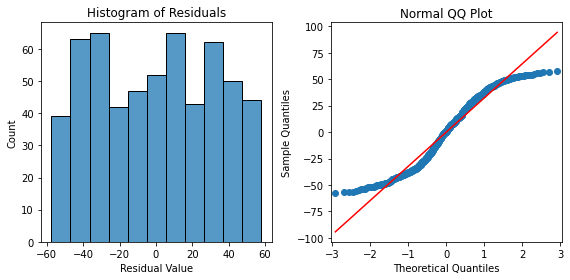

In [8]:
residuals = model.resid

# Create a 1x2 plot figure.
fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Create a histogram with the residuals.
sns.histplot(residuals, ax=axes[0])

# Set the x label of the residual plot.
axes[0].set_xlabel("Residual Value")

# Set the title of the residual plot.
axes[0].set_title("Histogram of Residuals")

# Create a QQ plot of the residuals.

### YOUR CODE HERE ### 

sm.qqplot(residuals, line='s',ax = axes[1])

# Set the title of the QQ plot.
axes[1].set_title("Normal QQ Plot")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()

# Show the plot.
plt.show()

There is reasonable concern that the normality assumption is not met when TV is used as the independent variable predicting Sales. The normal q-q forms an 'S' that deviates off the red diagonal line, which is not desired behavior.

However, for the purpose of the lab, continue assuming the normality assumption is met.

### verify the constant variance (homoscedasticity) assumption is met for this model

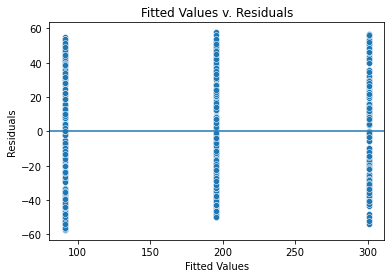

In [9]:

fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)

# Set the x axis label
fig.set_xlabel("Fitted Values")

# Set the y axis label
fig.set_ylabel("Residuals")

# Set the title
fig.set_title("Fitted Values v. Residuals")

# Add a line at y = 0 to visualize the variance of residuals above and below 0.

### YOUR CODE HERE ### 

fig.axhline(0)

# Show the plot
plt.show()

The variance where there are fitted values is similarly distributed, validating that the constant variance assumption is met

## Results and evaluation

In [11]:
# Display the model results summary. 

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     1918.
Date:                Mon, 17 Jul 2023   Prob (F-statistic):          1.38e-253
Time:                        13:51:22   Log-Likelihood:                -2798.9
No. Observations:                 572   AIC:                             5604.
Df Residuals:                     569   BIC:                             5617.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.8532      2.512    119.789      0.000     295.920     305.786
C(TV)[T.Low]     -209.8691      3.394    -61.841      0.000    -216.535    -203.203
C(TV)[T.Medium]  -105.4952      3.379    -31.224      0.000    -112.131     -98.859
==============================================================================
Omnibus:                      547.584   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.103
Skew:                           0.015   Prob(JB):                     8.77e-09
Kurtosis:                       1.753   Cond. No.                         3.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Question: What is your interpretation of the model's R-squared?

Using TV as the independent variable results in a linear regression model with  𝑅2=0.871
 .In other words, the model explains  87.1%
  of the variation in Sales. This makes the model an effective predictor of Sales.

* Question: What is your intepretation of the coefficient estimates? Are the coefficients statistically significant?

The default TV category for the model is High, because there are coefficients for the other two TV categories, Medium and Low. According to the model, Sales with a Medium or Low TV category are lower on average than Sales with a High TV category. For example, the model predicts that a Low TV promotion would be 209.8691 (in millions of dollars) lower in Sales on average than a High TV promotion.

The p-value for all coefficients is 0.000
, meaning all coefficients are statistically significant at 𝑝=0.05
 .The 95% confidence intervals for each coefficient should be reported when presenting results to stakeholders. For instance, there is a 95%
 chance the interval [−215.353,−202.274]
 contains the true parameter of the slope of 𝛽𝑇𝑉𝐿𝑜𝑤
, which is the estimated difference in promotion sales when a Low TV promotion is chosen instead of a High TV promotion.

* Question: Do you think your model could be improved? Why or why not? How?

Given how accurate TV was as a predictor, the model could be improved with a more granular view of the TV promotions, such as additional categories or the actual TV promotion budgets. Further, additional variables, such as the location of the marketing campaign or the time of year, may increase model accuracy.

## Perform a one-way ANOVA test

In [12]:
# Create an one-way ANOVA table for the fit model

sm.stats.anova_lm(model, typ = 1)

,df,sum_sq,mean_sq,F,PR(>F)
C(TV),2.0,4.016116e+06,2.008058e+06,1917.749265,1.383230e-253
Residual,569.0,5.957948e+05,1.047091e+03,NaN,NaN


* Question: What are the null and alternative hypotheses for the ANOVA test?

The null hypothesis is that there is no difference in Sales based on the TV promotion budget.

The alternative hypothesis is that there is a difference in Sales based on the TV promotion budget.

* Question: What is your conclusion from the one-way ANOVA test?

The F-test statistic is 1917.75 and the p-value is 1.38∗10−253
 (i.e., very small). Because the p-value is less than 0.05, you would reject the null hypothesis that there is no difference in Sales based on the TV promotion budget.

* Question: What did the ANOVA test tell you?

The results of the one-way ANOVA test indicate that you can reject the null hypothesis in favor of the alternative hypothesis. There is a statistically significant difference in Sales among TV groups

## Perform an ANOVA post hoc test

If you have significant results from the one-way ANOVA test, you can apply ANOVA post hoc tests such as the Tukey’s HSD post hoc test.

Run the Tukey’s HSD post hoc test to compare if there is a significant difference between each pair of categories for TV.

In [13]:
# Perform the Tukey's HSD post hoc test.

tukey_oneway = pairwise_tukeyhsd(endog = data["Sales"], groups = data["TV"])

# Display the results
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
High,Low,-209.8691,-0.0,-217.8438,-201.8944,True
High,Medium,-105.4952,-0.0,-113.4346,-97.5557,True
Low,Medium,104.3739,-0.0,96.8261,111.9218,True


* Question: What is your interpretation of the Tukey HSD test?

The first row, which compares the High and Low TV groups, indicates that you can reject the null hypothesis that there is no significant difference between the Sales of these two groups.

You can also reject the null hypotheses for the two other pairwise comparisons that compare High to Medium and Low to Medium.

* Question: What did the post hoc tell you?**

A post hoc test was conducted to determine which TV groups are different and how many are different from each other. This provides more detail than the one-way ANOVA results, which can at most determine that at least one group is different. Further, using the Tukey HSD controls for the increasing probability of incorrectly rejecting a null hypothesis from peforming multiple tests.

The results were that Sales is not the same between any pair of TV groups.

## Considerations##
What are some key takeaways that you learned during this lab?

Box-plots are a helpful tool for visualizing the distribution of a variable across groups.
One-way ANOVA can be used to determine if there are significant differences among the means of three or more groups.
ANOVA post hoc tests provide a more detailed view of the pairwise differences between groups.